# Семинар по теории оптимальной траспортировки


На данном семинаре мы посследовательно разберем хронологию вывода основных уравнений теори оптимальной транспортировки, рассмотрим приложение данной теории для ряда задач, и проведем обзор современного применения оптимальной траспортировки для задач машинного обучения с использованием нейронных сетей.

# Структура семинара 
## Теория
1.   Введение в оптимальную транспортировку. Постановка задачи Гаспаром Монжем (Earth Moving Distance)
2.   Проблема вычисления Earth Moving Distance. 
3.   Постановка проблемы Леонидом Канторовичем

## Практика 

1.   Использование теории оптимальной транспортировки для задачи траспортировки продуктов между пекарнями и кафе
2.   Использование теории оптимальной транспортировки для задачи транспортировки/трансфера цвета между изображениями

## Дистанция Вассерштейна и Генеративные сети
1.   Дуальная постановка Канторовича
2.   Дистанция Вассерштейна 
3.   Вассерштейн Генеративно-Состязательные Сети






---

# Введение в теорию оптимальной транспортировки


## Постановка задачи Гаспаром Монжем (Earth Moving Distance)

Задача оптимальной транспортировки в математике называется задачей Можна Канторовича.

Формальное описание данное Монжем:

\\

$\displaystyle \inf_{T_{\#} \mu \ =\upsilon } \ \int _{\Omega} \ c( x,\ T( x)) \ \mu ( dx)$  

\\

Где: 

* $\Omega - \ измериое \ пространство $
* $с:\Omega\times \Omega\ \rightarrow \mathbb{R},$ 
* $\mu ,\nu \ вероятностные\ меры\ в\ пространстве\ \mathbb{P}( \Omega)$
* $\displaystyle T\ :\ \Omega \ \rightarrow \ \Omega $

Задача и заключается в минимизации этой работы поиском оптимального $\displaystyle T$
 

В данной постановке задачи это свойство мало применимо на практике в том числе в машинном обучении, так как в постановке Монжа массы не делимы. 

## Постановка проблемы Леонидом Канторовичем
Леонид Канторович изучил данную проблему в 20 веке переформулировал и упростил ее, чем и положил начало новых исследований в данной области. 


Постановка Канторовича осуществляет некотороую relaxation допуская возможность разделения масс для сохранения пропорции. 


Канторович поставил задачу, вместо поиска транспортного map искать transportation plan

\\
$$
\inf\iint c( x,y) \ P( dx,\ dy) ,\ \ P\in \prod ( \mu ,\ u)
$$


$\ P( X,Y) \ =\ \mu ( x) \ \times \ \nu ( Y)$

\\


Задача найти такую меру $\displaystyle P\ $ заданную на $\displaystyle X,\ Y$ что:

$\displaystyle  \begin{array}{{>{\displaystyle}l}}
\int _{\ x\ in\ X} P( dx,dy) =\nu ( y) \ -\ вся\ масса\ траспортированная\ из\ y\ \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ суммируется\ в\ значение\ распределения\ \nu ( y) \ в\ этой\ точке\\
\\
\int\nolimits _{\ y\ in\ Y} P( dx,dy) =\mu ( x) \ -\ вся\ масса\ траспортированная\ из\ x\ \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ суммируется\ в\ значение\ распределения\ \mu ( x) \ в\ этой\ точке
\end{array}$



При этом минимизирующую $\displaystyle \iint c( x,y) \ P( dx,\ dy)$



---



# Практика


Теория оптимальной транспортировки позволяет сравнивать два (взвешенных) облака точек $(X, a)$ и $(Y, b)$, где $X \in \mathbb{R}^{n \times d}$ и $Y \in \mathbb{R}^{m \times d}$ расположение в $n$ (соответственно и в $m$) точек размерностью $d$, и где $a \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ есть веса.

\\

Необходимое условие чтобы сумма весов была равна еденице, то есть $\sum_{i=1}^n a_i = \sum_{j=1}^m b_j = 1$.
Базовая идея оптимальной траспортировки заключается в том чтобы "траспортировать" массу расположенную $X$ в массу расположенную в точках $Y$.

\\

Давайте обозначим через $\mathcal{U}(a,b) = \left\{ P \in \mathbb{R}^{n \times m} \,|\, P \geq 0, \sum_{j=1}^m P_{ij} = a_i, \sum_{i=1}^n P_{ij} = b_j\right\}$ множество возможных траспортных планов.
Если $P \in \mathcal{U}(a,b)$, колличество $P_{ij} \geq 0$ должно рассматриваться как масса траспортированная с точки $X_i$ в точку $Y_j$. Поэтому мы и называем эту планом траспортировки.

\\

Мы также будем рассматривать матрицу стоимости $C \in \mathbb{R}^{n \times m}$. Значение $C_{ij}$ может быть рассмотрено как цена которую необходимо заплатить чтоб траспортировать одну точку массы из $X_i$ в $Y_j$. Эта цена обычно определяется позицией $X_i$ и $Y_j$, например $C_{ij} = \|X_i - Y_j\|$ or $C_{ij} = \|X_i - Y_j\|^2$.

\\


Тогда транспортируемая масса планом $P \in \mathcal{U}(a,b)$ имеет общую стоимость равно $\sum_{ij} P_{ij} C_{ij}$.
В теории оптимальной траснпортировки мы хотим найти такой план который минимизирует общую стоимость. Другими словами, мы хотим решить 
$$
    \min_{P \in \mathcal{U}(a,b)} \sum_{ij} C_{ij }P_{ij}.
$$

Данная прблема является линейной программой: целевая функция линейна $P$, и ограничения оптимизации тоже линейны для $P$. Мы можем решить данную проблему сипользуя классические алгоритмы линейного программирования, например симплекс-методом.

Если $P^*$ это решение проблемы оптимальной тарспортировки,мы скажем что $P^*$ оптимальный траспорт между $(X, a)$ и $(Y, b)$, и что $\sum_{ij} P^*_{ij} C_{ij}$ это дистанция оптимальной траспортировка $(X, a)$ и $(Y, b)$: это минимальное значение энергии/работы которое необходимо потратить чтобы траспортировать массу расположенную в точках $X$ в целевое значение масс расположенных в точках $Y$.

# Использование теории оптимальной транспортировки для задачи траспортировки продуктов между пекарнями и кафе

В данной задаче мы имеем позиции пекарень $X \in \mathbb{R}^{8 \times 2}$ и соответсвующее им продукты $a \in \mathbb{R}^8$ которые описываются облаком точек. Кафе в котором продается выпечка из пекарни обозначены расположением $Y \in \mathbb{R}^{5 \times 2}$ и $b \in \mathbb{R}^{5}$.

In [1]:
!pip install POT

import ot

     |████████████████████████████████| 650 kB 8.7 MB/s 


In [ ]:
import os
!pip install --upgrade git+https://github.com/mlss-skoltech/tutorials.git#subdirectory=optimal_transport_tutorial

  Cloning https://github.com/mlss-skoltech/tutorials.git to /tmp/pip-req-build-6fsnq5of
  Running command git clone -q https://github.com/mlss-skoltech/tutorials.git /tmp/pip-req-build-6fsnq5of
  Created wheel for optimaltransport: filename=optimaltransport-0.1-py3-none-any.whl size=7865019 sha256=b49908339716039addd5a29812dfbc228ec4666db18ed25ea00de84fb43a5038
  Stored in directory: /tmp/pip-ephem-wheel-cache-v6bpbqlr/wheels/93/81/f0/fbd6ec88d0527c458152912bf53e3ec6a2cd3df3b133f1fa7e
Successfully built optimaltransport


In [ ]:
import pkg_resources

DATA_PATH = pkg_resources.resource_filename('optimaltransport', 'data/')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data
import pickle

with open(DATA_PATH + 'croissants.pickle', 'rb') as file:
    croissants = pickle.load(file)

X = croissants['bakery_pos']
a = croissants['bakery_prod']
Y = croissants['cafe_pos']
b = croissants['cafe_prod']

print('Bakery productions =', a)
print('Café sales =', b)
print('Total number of croissants =', a.sum())

Bakery productions = [31. 48. 82. 30. 40. 48. 89. 73.]
Café sales = [82. 88. 92. 88. 91.]
Total number of croissants = 441.0


In [ ]:
X

array([[184.86464733, 201.8163543 ],
       [449.3486663 , 168.40784664],
       [245.41756746, 288.12166576],
       [273.95400109, 364.68282915],
       [494.58935376, 336.8424061 ],
       [738.19305545, 238.70491485],
       [736.10502372, 375.12298779],
       [537.74200949, 482.30861653]])

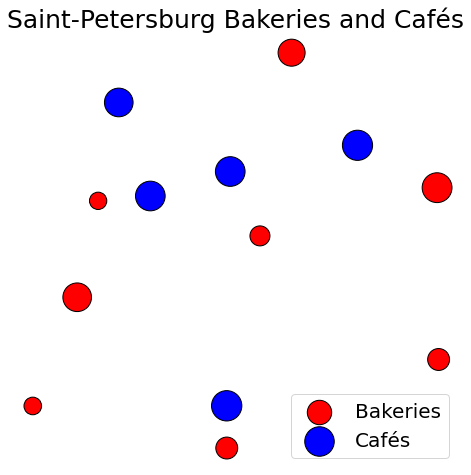

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
plt.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
plt.legend(fontsize=20)
plt.axis('off')
plt.title('Saint-Petersburg Bakeries and Cafés', fontsize=25)
plt.show()

Вычислим матрицу стоимости, где стоимость определяется расстоянием, вычислим такую матрицу используя расстояния $\ell_1$ и $\ell_2$.


In [ ]:
C_1 = np.zeros((8,5))
C_2 = np.zeros((8,5))
for i in range(8):
    for j in range(5):
        C_1[i,j] = np.linalg.norm(X[i]-Y[j])
        C_2[i,j] = C_1[i,j]**2

Теперь вычислим с помощью библиотеки ОТ оптимальную траспортировку выпечки из перкарен в кафе, для двух матриц расстояния по $\ell_1$ и $\ell_2$

In [ ]:
optimal_plan_1 = ot.emd(a, b, C_1)
print(optimal_plan_1)
optimal_cost_1 = np.sum(optimal_plan_1*C_1)
print('1-Wasserstein distance =', optimal_cost_1)
print('')

optimal_plan_2 = ot.emd(a, b, C_2)
print(optimal_plan_2)
optimal_cost_2 = np.sum(optimal_plan_2*C_2)
print('2-Wasserstein distance =', np.sqrt(optimal_cost_2))

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [25. 57.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0.  0.  0. 40.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [27.  0.  0. 46.  0.]]
1-Wasserstein distance = 61523.15971278249

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [52. 30.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0. 27.  0. 13.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [ 0.  0.  0. 73.  0.]]
2-Wasserstein distance = 3292.139032582319


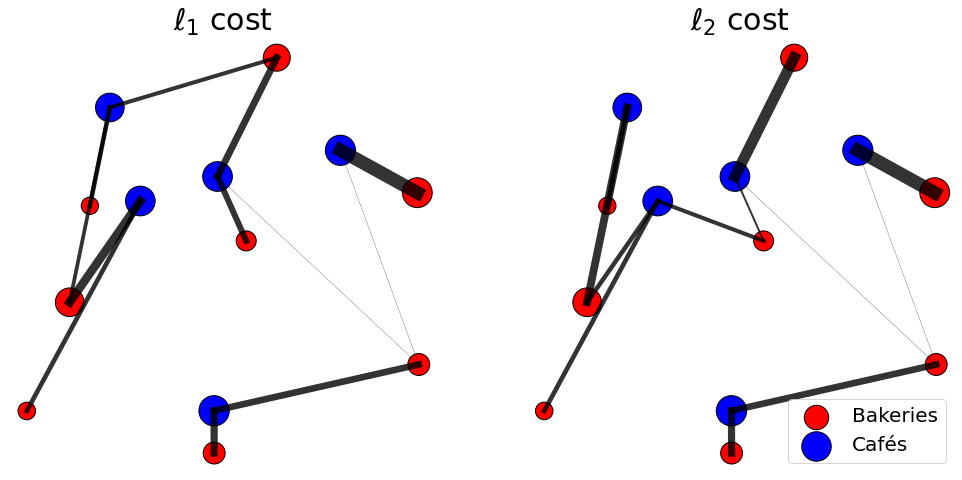

In [ ]:
fig = plt.figure(figsize=(17,8))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
ax.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        ax.plot([X[i,0], Y[j,0]], [X[i,1], Y[j,1]], c='k', lw=0.15*optimal_plan_1[i,j], alpha=0.8)
ax.axis('off')
ax.set_title('$\ell_1$ cost', fontsize=30)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
ax.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        ax.plot([X[i,0], Y[j,0]], [X[i,1], Y[j,1]], c='k', lw=0.15*optimal_plan_2[i,j], alpha=0.8)
ax.axis('off')
ax.set_title('$\ell_2$ cost', fontsize=30)

plt.legend(fontsize=20)
plt.show()

## Использование теории оптимальной транспортировки для задачи транспортировки/трансфера цвета между изображениями

Для исходного и целевого изображений цель передачи цвета состоит в том, чтобы преобразовать цвета исходного изображения так, чтобы оно было похоже на цветовую палитру целевого изображения. В конце концов, мы хотим найти «цветовое отображение», дающее каждому цвету исходного изображения новый цвет. Это можно сделать, вычислив оптимальный транспортный план между двумя изображениями, которые видны как облака точек в пространстве RGB.

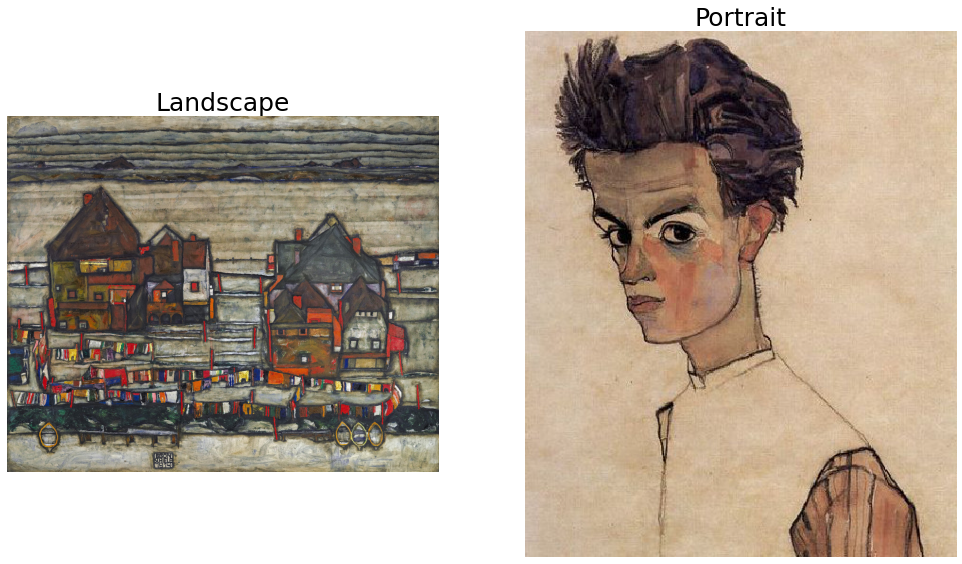

In [ ]:
import numpy as np
import ot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from mpl_toolkits.mplot3d import Axes3D

I1 = imread(DATA_PATH + 'schiele.jpg').astype(np.float64) / 256
I2 = imread(DATA_PATH + 'schiele2.jpg').astype(np.float64) / 256

fig = plt.figure(figsize=(17, 30))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(I1)
ax.set_title('Landscape', fontsize=25)
ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.imshow(I2)
ax.set_title('Portrait', fontsize=25)
ax.axis('off')

plt.show()

Нам нужно будет работать с «матрицами» вместо изображений. Поскольку существует 3 цвета, изображения имеют форму (Ширина, Высота, 3), а соответствующие матрицы будут иметь форму (Ширина * Высота, 3).

In [ ]:
def im2mat(I):
    '''Convert image I to matrix.'''
    return I.reshape(-1,3)

def mat2im(X, shape):
    '''Convert matrix X to image with shape 'shape'.'''
    return X.reshape(shape)

X1 = im2mat(I1)
X2 = im2mat(I2)

В реальных изображениях слишком много разных цветов, поэтому нам потребуется их подвыборка. Для этого мы используем K-средние для всех цветов и оставляем только вычисленные центроиды. Обратите внимание, что использование мини-пакетных K-средних ускоряет вычисления.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Size of the subsampled point clouds
nbsamples = 1000

kmeans1 = MiniBatchKMeans(n_clusters=nbsamples, init_size=nbsamples).fit(X1)
X1_sampled = kmeans1.cluster_centers_

kmeans2 = MiniBatchKMeans(n_clusters=nbsamples, init_size=nbsamples).fit(X2)
X2_sampled = kmeans2.cluster_centers_

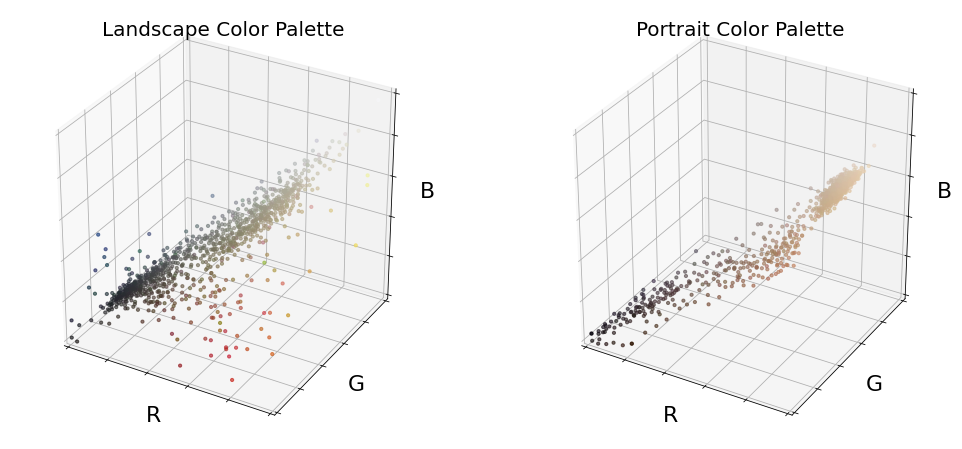

In [ ]:
def showImageAsPointCloud(X, Y):
    '''Show the color palette associated with images X and Y.'''
    fig = plt.figure(figsize=(17,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=X, s=10, marker='o', alpha=0.6)
    ax.set_xlabel('R',fontsize=22)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=22)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=22)
    ax.set_zticklabels([])
    ax.set_title('Landscape Color Palette', fontsize=20)
    ax.grid('off')
    
    ax = fig.add_subplot(122, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(Y[:,0], Y[:,1], Y[:,2], c=Y, s=10, marker='o', alpha=0.6)
    ax.set_xlabel('R',fontsize=22)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=22)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=22)
    ax.set_zticklabels([])
    ax.set_title('Portrait Color Palette', fontsize=20)
    ax.grid('off')
    
    plt.show()
showImageAsPointCloud(X1_sampled, X2_sampled)

Для того чтобы вычислить оптимальную траспортировку между двумя облаками точек как и в предыдущей задаче мы сперва должны задать некоторую дистанцию и в данной задаче мы будем использовать квадратичную дистанцию $C_{ij} = \|X_i - Y_j\|^2$.

In [ ]:
C_1 = np.ones((nbsamples,nbsamples))
C_2 = np.ones((nbsamples,nbsamples))
for i in range(nbsamples):
    for j in range(nbsamples):
        C_1[i,j] = np.linalg.norm(X1_sampled[i]-X2_sampled[j])
        C_2[i,j] = C_1[i,j]**2

In [ ]:
OT_plan = ot.emd(np.ones(nbsamples), np.ones(nbsamples), C_2)

In [ ]:
def colorTransfer(OT_plan, kmeans1, kmeans2, shape):
    '''Return the color-transfered image of shape "shape".'''
    samples_transformed = OT_plan.dot(kmeans2.cluster_centers_)
    X1_transformed = samples_transformed[kmeans1.labels_]
    return mat2im(X1_transformed, shape)

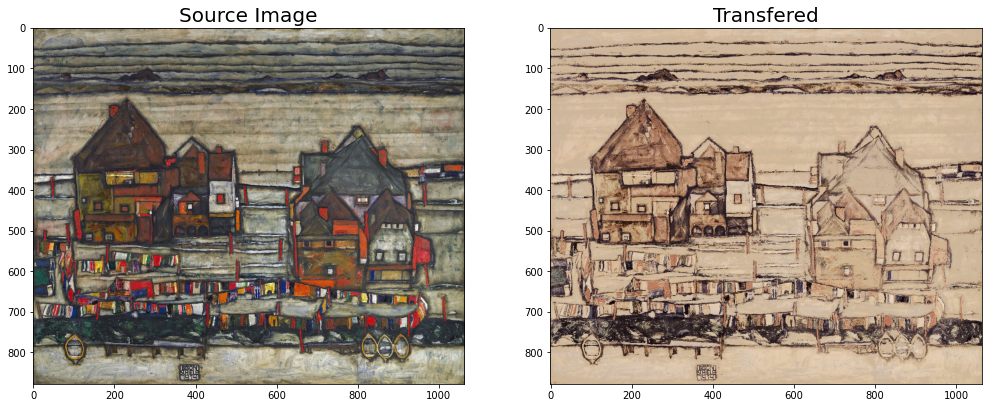

In [ ]:
fig = plt.figure(figsize=(17, 20))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(I1)
ax.set_title('Source Image', fontsize=20)

ax = fig.add_subplot(1, 2, 2)
I = colorTransfer(OT_plan, kmeans1, kmeans2, I1.shape)
ax.imshow(I)
ax.set_title('Transfered', fontsize=20)

plt.show()

--- 

 ## Дистанция Вассерштейна и Генеративно Состязательные Сети 

## Двойственная постановка Канторовича


\\

$$Primal:\inf_{P\in \prod ( \mu ,\nu )}\iint c( x,y) \ P( dx,\ dy)$$ 

\\

$$Dual:\displaystyle \sup _{ \begin{array}{{>{\displaystyle}l}}
\phi \in L_{1}( \mu ) ,\ \psi \ \in L_{1}( \nu )\\
\phi ( x) \ +\psi ( y) \ \leqslant c( x,y)
\end{array}}\int \phi d\mu +\int \psi d\nu \ $$  

\\
Логически возникающий вопрос: откуда двойственная постановка собственно возникает, и что означает перемнные там возникающие?

Глобально, идея данного подхода заключается в перестановке ограничений и перемнных местами, при этом задача минимизации меняется на задачу максимизации, например:

Осуществим вывод двойственной постановки:

\\

$$ 
L_{\prod }( P) \ =\ \sup _{\phi ,\psi }\left[\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP\right] \ =\{0\ if\ P\in \prod ( \mu ,\nu ) \ \ or\ +\infty \ otherwise\ \\
$$

\\
Данное выражение выглядит достаточно сложно. Глобально это выражение есть представление задачи оптмизации в такуй форме чтоб оптимизирубя ее мы смогли найти правильную функцию P, то есть правильный couplings. 

Это выражение утверждает что функция $\displaystyle P\ $(coupling) равна нулю если мы имеем правильные маргинальные распределения, и плюс бесконечность в любом другом случае. 


В данном выражении мы берем supremum от 

$$\displaystyle \int \phi d\mu +\int \psi d\nu $$

\\

Отнимает от этих функций них 

$$\displaystyle \iint \phi \ \oplus \ \psi dP$$ 
Где это выражение есть ничто иное как: 

\\
$$\displaystyle \iint \phi \ ( x) \ dP(x ,y) \ +\ \iint \psi ( y) dP( x,y)$$

\\

Как результат, если функция P задает правильные маргиналы то так как 

\\
$$\displaystyle \int \phi d\mu \ =\iint \phi ( x) dP(x ,y) \ \ и\ \int \psi d\nu \ =\ \iint \psi ( y) dP( x,y) $$ 

\\
Наше выражение будет равно нулю. Если coupling не верный, значит где то мы будем иметь не нулевое значение, и следовательно мы всегда можем максимизировать функции $\displaystyle \phi ,\ \psi $ в плюс бесконечность. 



Далее собственно и проделываем трюк перехода в двойственную задау. 

Если у нас есть некоторая функция которую необходимо оптимизировать, в нашем случае мы можем записать ее так:  

\\

$$\displaystyle \inf_{P\in \prod ( \mu ,\nu )}\iint cdP$$ и у нас есть некоторое условие, которое мы можем превратить в часть объектной функции 
$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint cdP+\ L_{\prod }( P)$$

\\

Запишем задачу в более детальной форме.

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint cdP+\sup _{\phi ,\psi }\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP\ $$

\\

Далее начинается алгебраическая игра, по упрощению выражения. Осуществим перемещение мест $\displaystyle \inf ,\sup $. Существуют терии доказывающие возможность такой перестановки. Но они выходят за рамки данного курса.  

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint cdP+\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP$$

\\

Перенесем все выражения (terms) с $\displaystyle P$ влево

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint cdP-\iint \phi \ \oplus \ \psi dP+\int \phi d\mu +\int \psi d\nu $$
\\
 

В таком случае более явно видно что мы имеем два двойных интеграла по $\displaystyle P$, их можно объеденить. 

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint ( c-\phi \ \oplus \ \psi ) dP+\int \phi d\mu +\int \psi d\nu $$

\\

И снова инверсия $\displaystyle \sup -\inf \ $

$$\displaystyle \sup _{\phi ,\psi } \ \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint ( c-\phi \ \oplus \ \psi ) dP+\int \phi d\mu +\int \psi d\nu $$

\\

В таком случае, в выражение, в первую очередь происходит интегрирование по $\displaystyle P$ и только потом по $\displaystyle \psi ,\phi $. 

\\

Вопрос, насколько низкие значения может принимать первая часть выражения? 

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\left[\iint ( c-\phi \ \oplus \ \psi ) dP\right] =\ \inf_{P\in P_{+}\left( \Omega^{2}\right)}\left[ с( x,y) -\iint \phi ( x) dP(x ,y) \ +\iint \psi ( y) dP( x,y)\right] \ $$  

 

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint ( c-\phi \ \oplus \ \psi ) dP\ =\ 0\ if\ \ c-\phi \ \oplus \ \psi \ \geqslant \ 0\ \ and\ -\infty \ otherwise$$


То есть если $\displaystyle c-\phi \ \oplus \ \psi $ ⩽ 0, то так как мы берем infimum наши значения функций будут принимать значения в минус бесконечность. Но если у нас $\displaystyle c-\phi \ \oplus \ \psi $ ⩾ 0,  то, так как мы берем infimum наши значения функций будут в адквате, ведь тогда самый минимум который мы можем получить это 0. Так как мы не максимизируем, риска что выражение  начет принимать значение плюс бесконечность у нас нет. Поэтому имеем два условия, и затем просто транслируем это свойство как необходимое условие для того чтобы мы имели решение двойственной постановки. 

$$\displaystyle \sup _{\phi \ \oplus \ \psi \ \leqslant c}\int \phi d\mu +\int \psi d\nu $$ - Dual


## Дистанция Вассерштейна

Дистанция вассершетйна есть ничто иное как задача контаровича на которой заданна некоторая метрика. В зависимости от метрики у нас будет выстраиваться опеределенные свойства.

Lистанция вассерштейна определяется в любой размерности и имеет такой общий вид: 
$$W_{p}^{p}(\mu ,\nu)=\inf _{P} \int P(x, y)\|x-y\|_{k}^{k} d x d y$$

Дистанция вассерштейна в двойственной постановке.



$$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{ \begin{array}{{>{\displaystyle}l}}
\phi \ ( x) \in L_{1}( \mu ) ,\ \psi ( y) \ \in L_{1}( \nu )\\
\phi ( x) \ \oplus \ \psi ( y) \ \leqslant D^{p}( x,y)
\end{array}}\int \phi d\mu +\int \psi d\nu $$

При двойственной постановке возникает вопрос о возможности еще сократить размерность параметров которые нам необхомдимо оптимизировать. Несмотря на то что мы сократили размер параметров, некоторая сложность c размерностью $\displaystyle \Omega$ все же сохраняется. 



Чтобы сократить размерность была применера достаочно интресная теория, под названием D -transforms. Которая уходит корнями к выпуклой оптимизации. 



Идея ее в следующем: 

Представим что мы нашли некоторую функцию $\displaystyle \phi $, как мы можем найти $\displaystyle \psi $?

Имея заданное нами ограничение $\displaystyle \phi \ \oplus \ \psi \ \leqslant D( x,y)$ мы можем легко вывести $\displaystyle \psi $ при имеющемся $\displaystyle \phi $.



$\displaystyle  \begin{array}{{>{\displaystyle}l}}
\psi ( y) \ \leqslant D^{p}( x,y) -\ \phi ( x) \ \\
\\
\psi ( y) \ \leqslant \inf_{x} D^{p}( x,y) -\ \phi ( x) \ 
\end{array}$



Определяя в этом уровнении infimum мы собственно и определяем функцию $\displaystyle \psi $ 



$\displaystyle \phi ^{'}( y) \ \leqslant \inf_{x} D^{p}( x,y) -\ \phi ( x)$

$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ }\int \phi d\mu +\int \phi 'd\nu $


$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ is\ D^{p} \ concave}\int \phi d\mu +\int \phi 'd\nu $ - Semi Dual 



Важным замечанием является что: $\displaystyle D^{p} \ concave\ equal\ to\ L_{1} \ Lipshetz\ $

То есть если функции \ Липшецевы, тогда дистанция является дистанцией вассерштена. 

(на данный моменд доказательство этого мы опустим)



В случае если $\displaystyle D^{1}$ то есть p=1 тогда мы можем записать дистанцию вассерштейна так.



$\displaystyle W^{1}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ is\ D^{p} \ concave}\int \phi ( d\mu -d\nu )$


Для удобства заменим функций на обозначение через $f$


$$W_{c}[p, q]=\sup _{f \in L_{c}}\left[\int f(x) p(x) d x-\int f(y) q(y) d y\right]$$

И запишем условие этой оптимизации что функция $L_c$ должна оставаться Липшецевой 

Давайте теперь помыслим еще раз, какую задачу решает функция $f$ в данной формулеровке: Предположим что распределения с которыми мы работаем являются распределениями изображений людей $P$ и животных $Q$

Однако сама по себе формула имеет довольно интуитивное толкование. Очевидно, что если
p равно q, разница между их ожидаемыми значениями любой функции f будет равна нулю, и, следовательно, расхождение исчезнет. Теперь предположим, что p и q различаются в некоторой области своего домена. В этом случае расхождение получается путем нахождения функции f, которая максимизирует эту разницу в терминах ее ожидаемого значения. Другими словами, f действует как детектор признаков, который выделяет признаки, максимально отличающие p от q. Например, представьте, что p это распределение по изображениям ландшафта без следов человеческой деятельности, а q - распределение по изображениям ландшафта с самолетом в небе. В этом случае оптимальным f будет плоский детектор. Из этого примера вы можете увидеть, как f играет роль дискриминатора в Wasserstein GAN. Обратите внимание, что без каких-либо ограничений на f любую небольшую разницу в распределениях можно произвольно увеличить, и расхождение будет бесконечным.

Давайте теперь используем нейронные сети в качестве функции $f$

In [ ]:
import argparse
import os
import numpy as np
import math
import sys

In [ ]:
!pip install torch

In [ ]:
!pip install torchvision

In [ ]:
import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

In [ ]:
dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
img_shape = (1, 28, 28)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(28*28)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
        )

    def forward(self, img):
        img_flat = img.view(img.shape[0], -1)
        validity = self.model(img_flat)
        return validity


# Initialize generator and discriminator
discriminator = Discriminator()

# Optimizers
optimizer_D = torch.optim.RMSprop(discriminator.parameters(), lr=0.00005)

Но какие распределения мы будем использовать? Давайте попробоуем вместо P использовать распределение которые мы получаем некоторой функцией преобразующее нормальное распределение некоторой размерности. 

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(100, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.shape[0], *img_shape)
        return img

generator = Generator()
optimizer_G = torch.optim.RMSprop(generator.parameters(), lr=0.00005)


Теперь попробуем обучить функцию генератора таким образом чтоб то распределение в которое он трансформирует нормальное было максимально близко к распределению изображений $P_{θ}=g_{\theta}(Z)$ to match $P_r$. 

Мы можем для фиксированного $g_{\theta}$ вычислить функцию $f_{w}$ так чтобы она показывала точную  дистанцию вассерштейна, между сгенерированными и реальными изображениями.
Затем мы можем использовать данное значение для обучения генератора с помощью backprop  

$$\begin{aligned} \nabla_{\theta} W\left(P_{r}, P_{\theta}\right) &=\nabla_{\theta}\left(\mathbb{E}_{x \sim P_{r}}\left[f_{w}(x)\right]-\mathbb{E}_{z \sim Z}\left[f_{w}\left(g_{\theta}(z)\right)\right]\right) \\ &=-\mathbb{E}_{z \sim Z}\left[\nabla_{\theta} f_{w}\left(g_{\theta}(z)\right)\right] \end{aligned}$$ 

Алгоритм будет выглядеть так:

*   For a fixed $\theta$, compute an approximation of $W(P_r,P_\theta)$ by training fw to convergence.
* Once we find the optimal fw, compute the θ gradient $ -\mathbb{E}_{z \sim Z}\left[\nabla_{\theta} f_{w}\left(g_{\theta}(z)\right)\right]$ by sampling several $z$.
*   Update θ, and repeat the process.



In [ ]:
Tensor = torch.FloatTensor
batches_done = 0
for epoch in range(100):

    for i, (imgs, _) in enumerate(dataloader):

        # Configure input
        real_imgs = Variable(imgs)

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Sample noise as generator input
        z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], 100))))

        # Generate a batch of images
        fake_imgs = generator(z).detach()
        # Adversarial loss
        loss_D = -torch.mean(discriminator(real_imgs)) + torch.mean(discriminator(fake_imgs))

        loss_D.backward()
        optimizer_D.step()

        # Clip weights of discriminator
        for p in discriminator.parameters():
            p.data.clamp_(-0.01, 0.01)

        # Train the generator every n_critic iterations
        if i % 5 == 0:

            # -----------------
            #  Train Generator
            # -----------------

            optimizer_G.zero_grad()

            # Generate a batch of images
            gen_imgs = generator(z)
            # Adversarial loss
            loss_G = -torch.mean(discriminator(gen_imgs))

            loss_G.backward()
            optimizer_G.step()

            print(
                "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
                % (epoch, 100, batches_done % len(dataloader), len(dataloader), loss_D.item(), loss_G.item())
            )

[Epoch 0/100] [Batch 0/938] [D loss: -0.043352] [G loss: -0.002474]
[Epoch 0/100] [Batch 0/938] [D loss: -0.156042] [G loss: -0.005642]
[Epoch 0/100] [Batch 0/938] [D loss: -0.422624] [G loss: -0.016919]
[Epoch 0/100] [Batch 0/938] [D loss: -0.697366] [G loss: -0.042300]
[Epoch 0/100] [Batch 0/938] [D loss: -1.142022] [G loss: -0.086177]
[Epoch 0/100] [Batch 0/938] [D loss: -1.516656] [G loss: -0.150256]
[Epoch 0/100] [Batch 0/938] [D loss: -1.976877] [G loss: -0.237752]
[Epoch 0/100] [Batch 0/938] [D loss: -2.336246] [G loss: -0.348446]
[Epoch 0/100] [Batch 0/938] [D loss: -2.821259] [G loss: -0.475589]
[Epoch 0/100] [Batch 0/938] [D loss: -2.888724] [G loss: -0.652841]
[Epoch 0/100] [Batch 0/938] [D loss: -3.510475] [G loss: -0.829267]
[Epoch 0/100] [Batch 0/938] [D loss: -3.544203] [G loss: -1.068272]
[Epoch 0/100] [Batch 0/938] [D loss: -3.874634] [G loss: -1.226596]
[Epoch 0/100] [Batch 0/938] [D loss: -4.112674] [G loss: -1.507607]
[Epoch 0/100] [Batch 0/938] [D loss: -4.549211] 

KeyboardInterrupt: ignored